<h2>The Final One</h2>

In [34]:
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
# getting data
def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

In [3]:
# for data cleaning
# Check for and handle missing values
# Feature selection: Use only 'Close' price as the target variable
def preprocess_data(data):
    data.dropna(inplace=True)
    data = data[['Close']]
    return data

In [4]:
# ploting graph
def plot_polynomial_regression(data, model, degree):
    X = np.arange(len(data)).reshape(-1, 1)
    y = data['Close'].values.reshape(-1, 1)
    X_poly = PolynomialFeatures(degree=degree).fit_transform(X)
    y_pred = model.predict(X_poly)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Prices')
    plt.plot(X, y_pred, color='red', label='Polynomial Regression (Degree {})'.format(degree))
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title('Google Share Prices - Polynomial Regression')
    plt.legend()
    plt.show()

In [5]:
# model training code
def train_polynomial_regression(data, degree):
    X = np.arange(len(data)).reshape(-1, 1)
    y = data['Close'].values.reshape(-1, 1)

    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    return model

In [6]:
# r2 value ranges from 0 to 1 1 for pretty good
def calculate_r2_score(data, model, degree):
    X = np.arange(len(data)).reshape(-1, 1)
    y = data['Close'].values.reshape(-1, 1)
    X_poly = PolynomialFeatures(degree=degree).fit_transform(X)
    y_pred = model.predict(X_poly)

    r2 = r2_score(y, y_pred)
    return r2

In [12]:
def predict_prices(model, degree, start_date, end_date):
    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    X_pred = np.arange(len(dates)).reshape(-1, 1)
    X_pred_poly = PolynomialFeatures(degree=degree).fit_transform(X_pred)
    y_pred = model.predict(X_pred_poly)

    predictions_df = pd.DataFrame({'Date': dates, 'Predicted_Close': y_pred.flatten()})
    predictions_df.set_index('Date', inplace=True)

    return predictions_df

In [25]:
# plot for prediction time period
def plot_prediction_period(data,predictions_df):
    plt.figure(figsize=(8,4))
    plt.plot(predictions_df.index, predictions_df['Predicted_Close'], label='Predicted Close Price', color='red')
    plt.scatter(data.index, data['Close'], label='Actual Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Predicted vs Actual Close Price')
    plt.ylim(0,120)
    plt.legend()
    plt.show()

In [35]:
# calculating mean absolute error
def average_difference(actual_data, predictions_df):
    y_actual = actual_data['Close'].values
    y_pred = predictions_df['Predicted_Close'].values
    diff = y_actual - y_pred
    ad= diff.mean()
    return ad

[*********************100%***********************]  1 of 1 completed
R-squared score: 0.9733


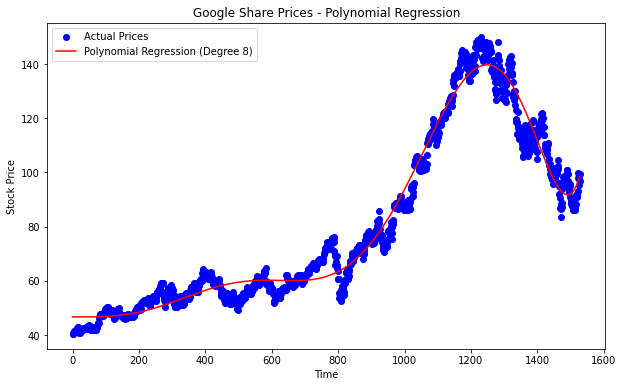

In [42]:
if __name__ == "__main__":
    ticker = "GOOGL"
    start_date = "2017-01-01"
    end_date = "2023-01-31"
    degree = 8

    # Fetch historical stock data from Yahoo Finance
    stock_data = fetch_stock_data(ticker, start_date, end_date)

    # data cleaning
    stock_data=preprocess_data(stock_data)

    # Train polynomial regression model
    model = train_polynomial_regression(stock_data, degree)

    # Calculate R-squared score
    r2 = calculate_r2_score(stock_data, model, degree)
    print(f"R-squared score: {r2:.4f}")

    # Plot the results
    plot_polynomial_regression(stock_data, model, degree)

    #predicting for the week 
    start_date_prediction = "2023-02-05"
    end_date_prediction = "2023-02-11"
    predictions_df = predict_prices(model, degree, start_date_prediction, end_date_prediction)


In [57]:
print(predictions_df)

            Predicted_Close
Date                       
2023-02-05        46.704217
2023-02-06        46.704217
2023-02-07        46.704217
2023-02-08        46.704217
2023-02-09        46.704218
2023-02-10        46.704219
2023-02-11        46.704220


In [58]:
# comparing the predict vs the actual closing values
data = fetch_stock_data(ticker,start_date_prediction,end_date_prediction)
print("the average actual closing prics is ",data["Close"].mean())

[*********************100%***********************]  1 of 1 completed
the average actual closing prics is  99.89800109863282


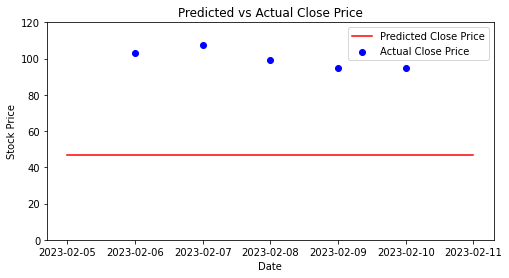

In [49]:
plot_prediction_period(data,predictions_df)

<h1>Final assesment</h1>

<p>As is observable the prices according to past trends should be "46.704217".
But the average of actual closing prices on the dates under question turns up to be "99.898001".
which is higher than the predicted value which means the anouncement of google Bard was positively recieved by the market.
</p>